<a href="https://colab.research.google.com/github/saptaksubhra/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>








# What is AirBNB ?

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales and hospitality service for people to lease or rent short-term lodging including holiday cottages, apartments, homestays, hostel beds, or hotel rooms. Basically they provide the platform that is shared by hosts and visitors worldwide. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com. 

# Initial Setup :

# A.Importing Neccessary Libraries 

# B.Acquaring and Loading AirBNB Dataset

# C. Understanding the dataset

# D.Data Cleaning:

* Dropping duplicates

* Checking the missing values

* Removing redundant or unnecessary columns

* Dealing with missing values

* Checking the NaN values in the dataset

* Remove the NaN values from the dataset

* Checking zero values

* Dealing with invalid data

#E. Exploration and Data Visualization


Questions to be answered :

* What can we learn about different hosts and areas?
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

* Find out Total Count of Each Room Type as per Listing.

* What is the average preferred price by the customers in accordance with locations ?

* Where the customers pay the maximum and minimum rent ( in terms of locations ) ?

* What can we learn from predictions? (ex: locations, prices, reviews, etc)

* Find total number of nights spent per room type.

* Find total number of nights spent per location.



#A. **Importing Necessary Libraries**

In this section, the drive is loaded onto the colab platform and then we import the files onto the colab platform.







In [2]:
# Importing required libraries first and foremost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# B. **Acquaring and Loading AirBNB Dataset**

In [3]:
# Mount google drive to have access the dataset of Airbnb

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
# Loading data from Airbnb csv file

df_airbnb = pd.read_csv('/content/drive/MyDrive/Almabetter Capstone Projects/AirBNB EDA Project/Airbnb NYC 2019.csv')

In [6]:
df_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# C.**Understanding the dataset**

In [7]:
# Getting into data to have an overview
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
# Checking the number of rows to comprehend the size of the given dataset

len(df_airbnb)

48895

In [9]:
# Checking the number of rows and columns of the dataset
df_airbnb.shape

(48895, 16)

**# Gaining important information of the dataset**

In [10]:
# Checking the data type of each column

df_airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [11]:
# Checking data types and non-null values count

df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

The columns with missing values are **name, host_name, last_review, and reviews_per_month** beacuse these columns are having non-null values less than 48895 (dataframe size).

In [12]:
# Making a copy of the orginal dataset for EDA purpose

df_airbnb_copy = df_airbnb.copy()
df_airbnb_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
# Dataset copied from the original dataset
df_airbnb_copy

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Observations :
# D. **Data Cleaning**

So, it is evident from the dataset that we have 48895 number of rows and 16 columns.  Some columns have null values and missing data. We need to clean those. In the data cleaning step, we Load the dataset into a data frame using Pandas functions,explore the number of rows & columns, ranges of values and then Handle missing, incorrect and invalid data and Perform any additional steps ( Dropping duplicates, Checking the missing values, Dealing with missing values, Removing redundant or unnecessary columns, Checking the NaN values, 
Removing the NaN values, Remove the NaN values from the dataset, Checking zero values and dealing with invalid data ). These steps are explained along with codes.

# Dropping Duplicates

In [14]:
# Checking duplicates in the dataset

df_airbnb_copy.duplicated().sum()



0

In [15]:
# Removing duplicates if any in the dataset

df_airbnb_copy.drop_duplicates(inplace = True)

# Checking the missing values

After checking the information of the dataset we are already able to see NaN values in each column, therefore need to examine missing values further before continuing with the analysis.



In [16]:
# Looking for those columns having null values
# By using sum() function, we will able to see how many null values are present in each column of the dataset

df_airbnb_copy.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# From the above dataset we can observe that :
* The columns with null values are 'name', 'host_name', 'last_review' and 'reviews_per_month'.
* The last two columns ( 'last_review' and 'reviews_per_month' ) are having over 10000 rows of missing values.
* The column reviews_per_month would be interesting to analyze and the better way to deal with this column is to replace all NaN values with zeros.
* The rest 3 columns will not be used for the analysis and should be dropped.

So, let's move on with dropping columns that are unimportnat and handle missing data.

# Removing redundant or unnecessary columns

In [17]:
# We are dropping columns that are insignificant and unethical as fas as our future data exploration and predictions are concerned.
# Also, we are dropping 'host_name' column as this is relating to the names of actual human beings and also that presents no security threat.

df_airbnb_copy.drop(['id','name', 'host_name', 'last_review'], axis = 1, inplace = True)

In [18]:
# Checking changes in the dataframe

print('The updated shape of the dataframe is : ', df_airbnb_copy.shape)
df_airbnb_copy.head()

The updated shape of the dataframe is :  (48895, 12)


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Dealing with missing values

In [19]:
# Replacing all NaN values with 0 in 'reviews_per_month'

df_airbnb_copy.fillna({'reviews_per_month' : 0 }, inplace = True)

In [20]:
# Checking changes in the dataframe

df_airbnb_copy.reviews_per_month.isnull().sum()

0

# Checking the NaN values

In [21]:
# Checking the null values in the dataset

df_airbnb_copy.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

No null value has been found in the dataset and if it is found then need to remove rows and columns with null values.

# Removing the NaN values

In [22]:
# Removing the NaN values from the dataset

df_airbnb_copy.dropna(how = 'any', inplace = True)

In [23]:
# Getting a summary of the dataframe
df_airbnb_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

No null or NaN value has been found out in any column of the dataset.

# Checking zero values

In [24]:
(df_airbnb_copy == 0).sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                 10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

# Observations:

* Four columns are avilable with zero values.
* 'price' column can be zero for somw promotional offers of AirBNB.
* 'number_of_reviews' and 'reviews_per_month' can be zero if people did not provide reviews.
* And 'availability_365' column can be zero as some people provided reviews without staying in. Hence these values will be dropped from the list.

# Dealing with invalid data

In [25]:
# Checking the size of the dataframe

df_airbnb_copy.shape

(48895, 12)

In [26]:
for col in range(len(df_airbnb_copy)):
  if df_airbnb_copy.availability_365[col] == 0 and df_airbnb_copy.number_of_reviews[col] != 0:
    df_airbnb_copy.drop([col], inplace = True)


In [27]:
# Rechecking the shape of the dataframe

df_airbnb_copy.shape

(36207, 12)


Now we can visualize that our dataset rows have been reduced to 36207 all the way from 48895

# E. **Exploration and Data Visualization**

In [28]:
# By implementing describe() function to have several summary statistics excluding NaN values

df_airbnb_copy.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.620700e+04,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000
mean,7.627096e+07,40.728764,-73.950054,161.832491,7.955561,27.590079,1.307588,9.156185,152.303229
std,8.393650e+07,0.055803,0.049606,254.232662,22.787553,49.266153,1.735645,38.042091,131.818455
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8.618096e+06,40.689220,-73.983240,70.000000,1.000000,0.000000,0.000000,1.000000,21.000000
50%,3.681609e+07,40.723890,-73.954760,110.000000,3.000000,6.000000,0.610000,1.000000,125.000000
75%,1.316910e+08,40.763180,-73.932070,187.000000,5.000000,32.000000,2.030000,3.000000,283.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


At the outset, the summary statistics summarizes that
* the average price of listing is $161.83
* the average  minimum number of nights requierd to stay in a single visit is 7.95 nights
* the average total number of reviews provided by visitors is 27.59 reviews
* the average reviews per month is 1.30
* the average total number of listings registered under the name of the host is 9.15 listings
* the average number of days for which a host is available around a year is 152.30 days

But, there is definitely something wrong with this dataset as the minimum price is shown as $0 and maximum price as 10000 dollars. So, we need to look into this dataset and look out for outliers.

In [29]:
# Checking all columns list in the dataset
df_airbnb_copy.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Let's move on to check out some interesting categorical unique values from the dataset.

In [30]:
# Checking the unique values of 'neighbourhood_group' for number of neighbourhood groups

print('Total number of unique values in neighbourhood group is : ', len(df_airbnb_copy.neighbourhood_group.unique()))
df_airbnb_copy['neighbourhood_group'].unique()

Total number of unique values in neighbourhood group is :  5


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [31]:
# Checking the unique values of 'neighbourhood' for number of neighbourhoods

print('Total number of unique values in neighbourhood is : ', len(df_airbnb_copy.neighbourhood.unique()))
df_airbnb_copy['neighbourhood'].unique()

Total number of unique values in neighbourhood is :  220


array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'Murray Hill',
       "Hell's Kitchen", 'Chinatown', 'Upper West Side', 'South Slope',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'East Harlem', 'Park Slope', 'Bedford-Stuyvesant',
       'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint',
       'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'West Village', 'Gowanus', 'Flatlands',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Ridgewood', 'Morningside Heights', 'Jamaica',
       'Middle Village', 'NoHo', 'Ditmars Steinway', 'Cobble Hill',
       'Flatiron District', 'Roosevelt Island', 'Greenwich Village',
       'East Flatbush', 'Tompkinsville', 'Astoria', 'Clason Point',
       'Eastchester', '

In [32]:
# Checking the unique values of room_type column for number room types available for rental

print('The total number of unique values in room_type is :  ', len(df_airbnb_copy.room_type.unique()))
df_airbnb_copy['room_type'].unique()

The total number of unique values in room_type is :   3


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [33]:
# Number of unique host ids for Airbnb hosts

print('The number of host ids for Airbnb hosts is : ')
df_airbnb_copy.host_id.nunique()

The number of host ids for Airbnb hosts is : 


26388

At the outset, the dataset have 16 columns and 48895 rows. But, a significant number of values seem to be missing from 'last_review' and 'reviews_per_month' columns. It has information regarding the listings, e.g., 'id', 'host_name', 'room_type', 'price', 'neighbourhood'.

The ins and outs have been provided below after cleaning the dataset.

* 26388 unique host ids
* 12 columns
* Three types of room available for rental
* 36207 listings
* 220 unique neighbourhoods
* Five different types of neighbourhood group

# Observations of Columns :

Let's try to make out those columns in detail.

id : unique id to identify Airbnb listing                     
name : Represent the accommodation                            
host_id :a unique id identifying an airbnb host                           
host_name : name under whom host is registered                     
neighbourhood_group : a group of area               
neighbourhood : area which falls under neighbourhood_group                       
latitude : co-ordinate of listing                             
longitude : co-ordinate of listing                          
room_type : type to categorise listing rooms                           
price : price of listing                              
minimum_nights : The minimum number of nights requierd to stay in a single visit                    
number_of_reviews : Total number of reviews given by visitors                   
last_review : date of last review given                    
reviews_per_month : rate of reviews given on monthly basis                
calculated_host_listings_count : Total number of listings registered under the name of the host

availability_365 : the number of days for which a host is available in a year


latitude and longitude have epresentation in terms of the co-ordinate system, neighbourhood_group, neighbourhood and room_type are categorical type columns. last_review is a column of date type, we will convert it as per requirement. 


# Q1. What can we learn about different hosts and areas?

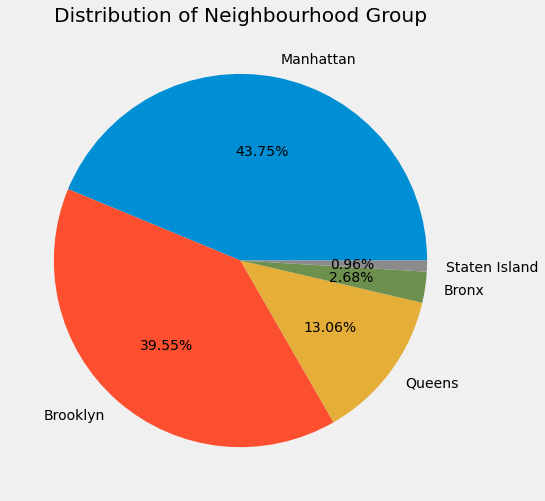

In [34]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,8))
plt.title('Distribution of Neighbourhood Group')
neighbourhood_group_count = df_airbnb_copy.neighbourhood_group.value_counts()
neighbourhood_group_label = df_airbnb_copy.neighbourhood_group.value_counts().index
pie_chart = plt.pie(neighbourhood_group_count, labels = neighbourhood_group_label, autopct = '%1.2f%%', startangle = 0)
plt.show()

# Observations  :

* The above pie chart depicts that Airbnb Listings in New York city near Manhattan and Brooklyn have the highest share of hotels. 
* Manhattan has the highest number of listings with 43.75% of the total listings, followed by Brooklyn with 39.55%. The rest three groups have significantly less listings as compared to those two previous listings.
* The rest three are Queens with 13.06%, Bronx with 2.68% and Staten Island with 0.96%. 

Now we can see which neighbourhood group has the highest number of listings in terms of bar graph.

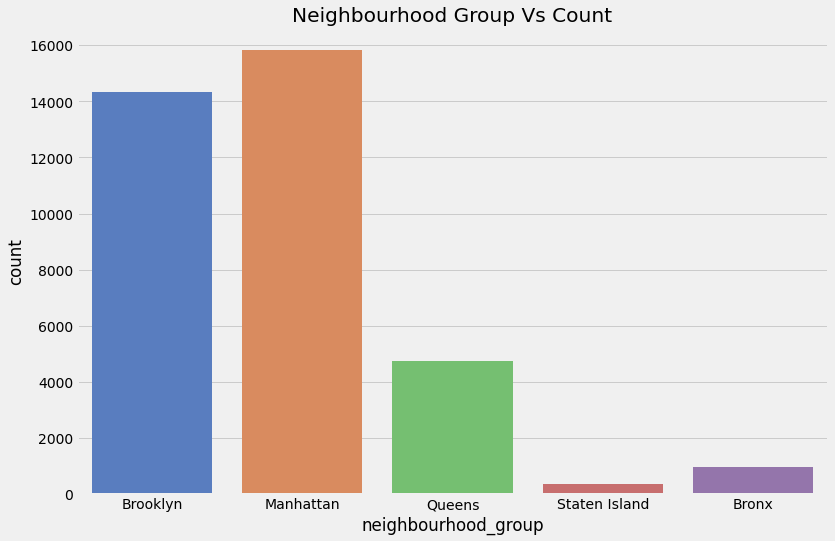

In [35]:
# Let's plot bar graph of neighbourhood group vs count

plt.figure(figsize = (12,8))
plt.title('Neighbourhood Group Vs Count')
sns.countplot(x = df_airbnb_copy.neighbourhood_group, palette = 'muted')
plt.show()


#  Observations :

* From the above bar graph, it can be visualized that Manhattan has the highest number of listings followed by Brooklyn, Queens, Bronx and Staten Island amongst neighbourhood group.
* The same observation is replicating in terms of piechart as we have seen in the previous piechart.

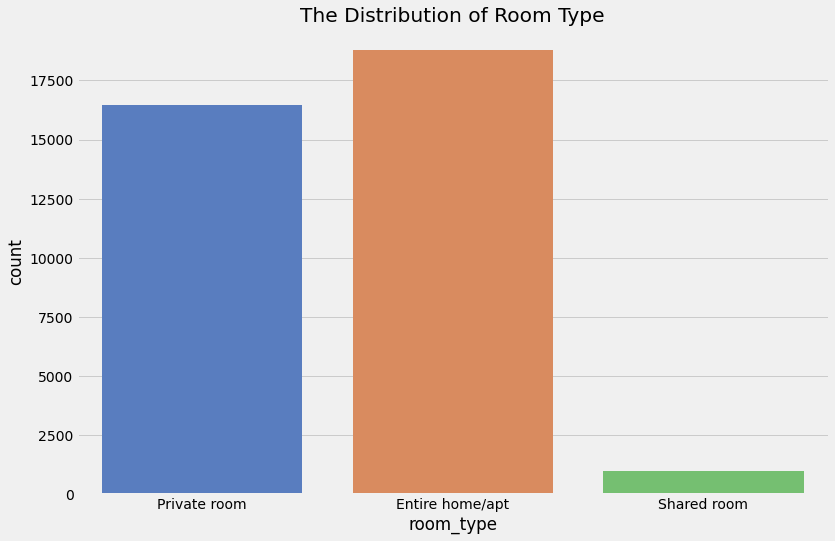

In [36]:
# Let's visualize the distrbution of room type

plt.figure(figsize = (12, 8))
plt.title('The Distribution of Room Type')
sns.countplot(x = df_airbnb_copy.room_type, palette = 'muted')
plt.show()


# Obervations :  
 * From this bar plot it can be said that 'Entire home/apt' has the highest number of listings followed by 'Private room'.
 * 'Shared room' has the lowest listings among room type.

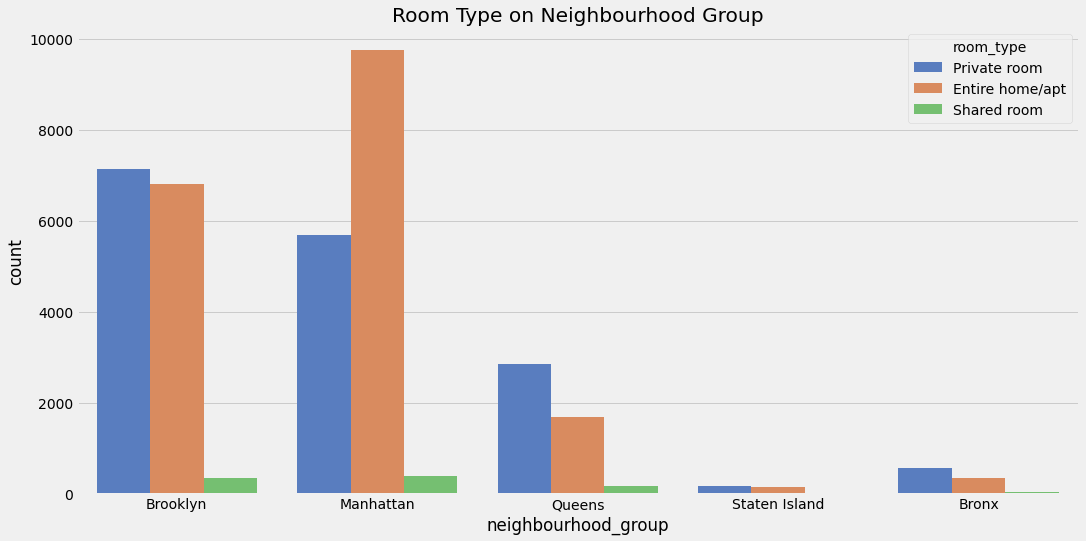

In [37]:
# Let's plot room type on neighbourhood group

plt.figure(figsize = (16,8))
plt.title('Room Type on Neighbourhood Group')
sns.countplot(x = df_airbnb_copy.neighbourhood_group, hue = df_airbnb_copy.room_type, palette = 'muted')
plt.show()


# Obervations :       

* The above graphs shows that 'Entite home/apt' is listed the most in case of Manhattan whereas 'Private room' and 'Entire home/apt' share the almost same number in Brooklyn.
* The number of private rooms of Airbnb in Brooklyn are way more than Manhattan, Queens, Bronx and Staten Island.
* The total number of shared rooms is very less in comparison with other two types of room type among neighbourhood groups.

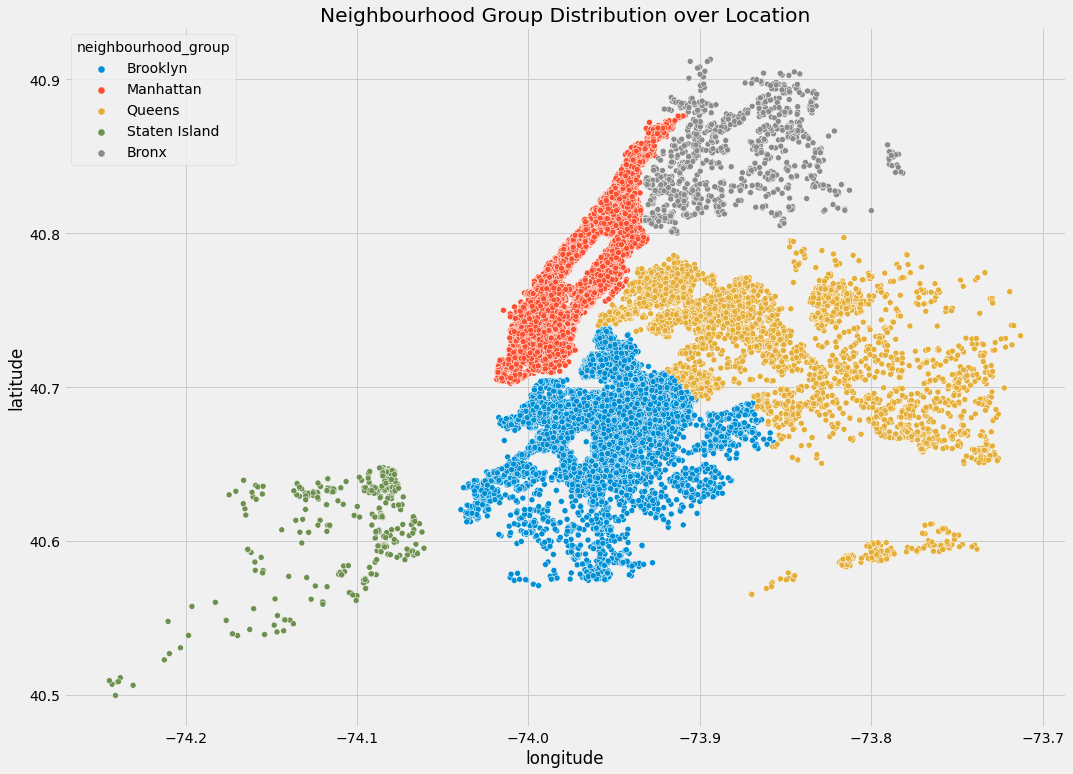

In [40]:
# Let's visualize neighborhood group distribution over location through scatter plot

plt.figure(figsize= (16, 12))
plt.title('Neighbourhood Group Distribution over Location')
sns.scatterplot(x= df_airbnb_copy.longitude, y = df_airbnb_copy.latitude, hue = df_airbnb_copy.neighbourhood_group)
plt.show()

# Q2. Which hosts are the busiest and why ?

In [51]:
# Let's have a look which hosts (IDs) have the most number of listings in Airbnb dataset platform

top_host = df_airbnb_copy.host_id.value_counts().head(8)
top_host

219517861    327
107434423    232
30283594     121
137358866     98
12243051      96
16098958      95
61391963      87
22541573      85
Name: host_id, dtype: int64

In [52]:
# Creating another dataframe of top host ids 

top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace = True)
top_host_df.rename(columns = {'index': 'host_id', 'host_id': 'Per_Count'}, inplace = True)
top_host_df

,host_id,Per_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,98
4,12243051,96
5,16098958,95
6,61391963,87
7,22541573,85


In [53]:
# From our dataset, we can have our findings by existing column named 'calculated_host_listings_count'
# We can check the maximum value of that column

top_host_check_val = df_airbnb_copy.calculated_host_listings_count.max()
top_host_check_val

327

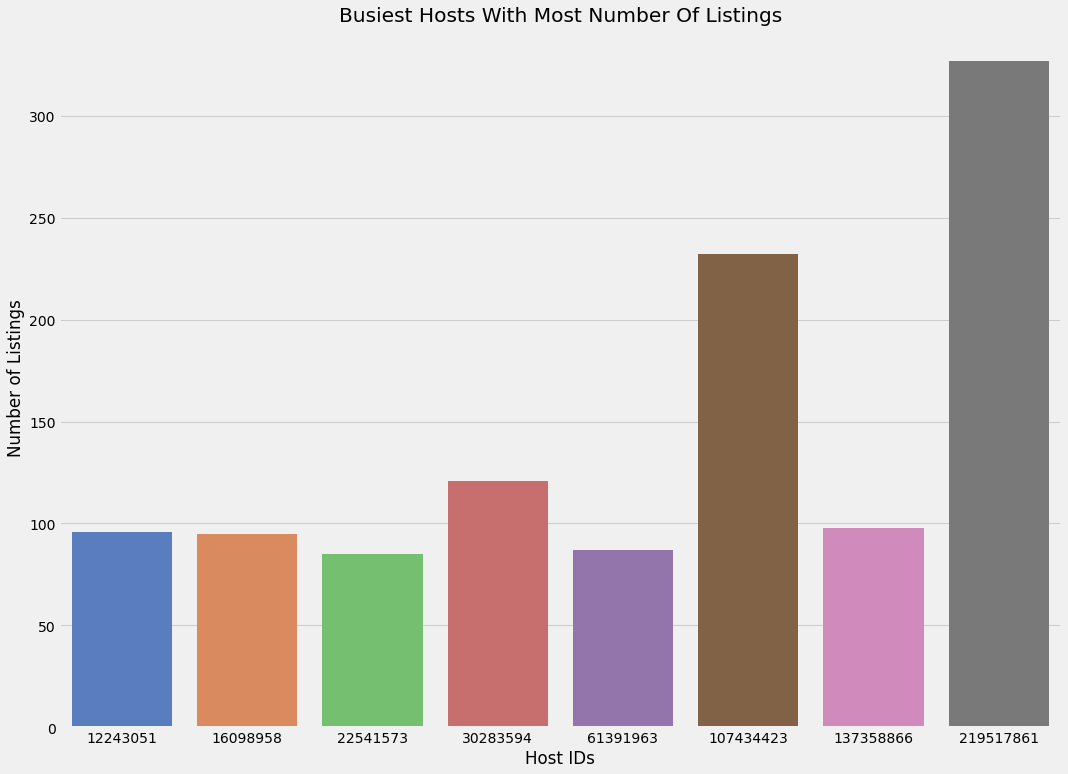

In [63]:
# Plotting a barplot on busiest hosts with the number of listings

plt.figure(figsize = (16,12))
vis = sns.barplot(x = 'host_id', y = 'Per_Count', data = top_host_df, palette = 'muted')
vis.set_title('Busiest Hosts With Most Number Of Listings')
vis.set_xlabel('Host IDs')
vis.set_ylabel('Number of Listings')
plt.show()

In [64]:
# Now taking the intersection of two dataframes 'top_host_df' and 'df_airbnb_copy'

df_int = pd.merge( top_host_df, df_airbnb_copy, how = 'inner', on = ['host_id'])
df_int.head()

,host_id,Per_Count,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,219517861,327,Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00,327,309
1,219517861,327,Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
2,219517861,327,Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,0.60,327,159
3,219517861,327,Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,1.86,327,91
4,219517861,327,Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2.59,327,81


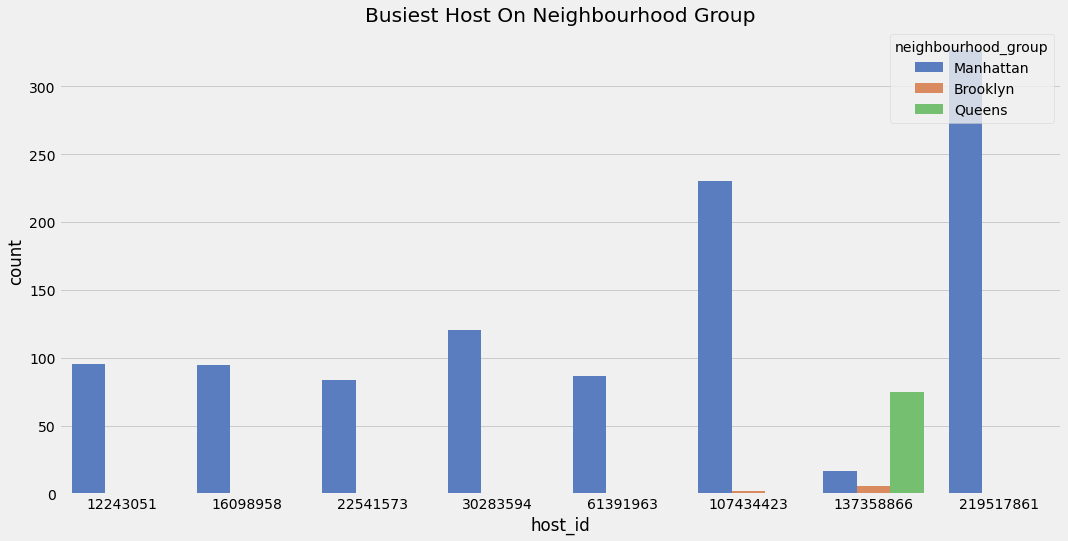

In [66]:
# Let's plot busiest host on neighbourhood group

plt.figure(figsize = (16,8))
plt.title('Busiest Host On Neighbourhood Group')
sns.countplot(x = df_int.host_id, hue = df_int.neighbourhood_group, palette = 'muted')
plt.show()

# Observations :    

* From the above graph, it can be observed that Manhattan group is having most number of listings.
* And all busiest hosts belong to Manhattan group.

# Q4.Find out Total Count of Each Room Type as per Listing

In [31]:
# Finding unique values of column room_type

df_airbnb_copy_room_type = df_airbnb_copy.room_type.unique()

In [32]:
df_airbnb_copy_room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [33]:
# Finding out the most listed room type

df_airbnb_copy_most_listed = dict(df_airbnb_copy.room_type.value_counts())

In [34]:
df_airbnb_copy_most_listed

{'Entire home/apt': 18786, 'Private room': 16442, 'Shared room': 979}

In [35]:
# Creating dataset for total count of each room type

dataset = list(df_airbnb_copy_most_listed.values())

In [36]:
dataset

[18786, 16442, 979]

In [37]:
room_type = list(df_airbnb_copy_most_listed.keys())

In [38]:
room_type

['Entire home/apt', 'Private room', 'Shared room']

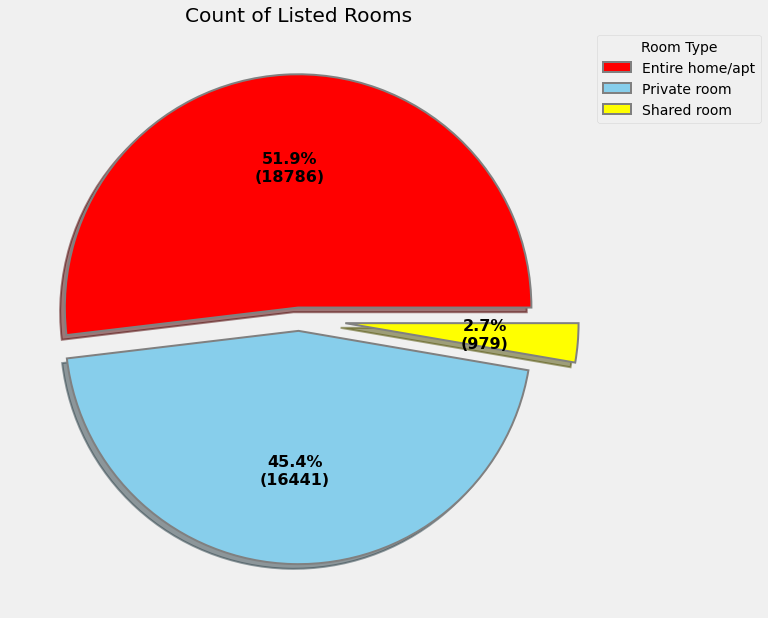

In [39]:
# Generating colour parameters

colors = ('red', 'skyblue', 'yellow')

# Creating explode data

explode = (0.05,0.05, 0.2)

# properities of wedge

wp = {'linewidth' : 2, 'edgecolor' : 'grey' }

# create autocpt arguments by creating a custom function

def fun(pct, allvalues):
  ''' This function creates autocpt arguments. '''
  abs = int(pct / 100 *np.sum(allvalues))
  return "{:.1f}%\n({:d})".format(pct, abs)

# Creating pie chart and plot

fig, airbnb_pie_chart = plt.subplots(figsize = (12, 10))
wedges, texts, autotexts = airbnb_pie_chart.pie(dataset, autopct = lambda pct: fun(pct, dataset), 
                                                  explode = explode, 
                                                  shadow = True, 
                                                  colors = colors, 
                                                  startangle = 0,
                                                  wedgeprops = wp, textprops = dict(color = 'black'))


# Adding legend
airbnb_pie_chart.legend(wedges, room_type,
                        title ="Room Type",
                        loc ="upper left",          
                        bbox_to_anchor=(1, 0., 7.,1))

plt.setp(autotexts, size = 16, weight = "bold")
airbnb_pie_chart.set_title("Count of Listed Rooms")
plt.show()


# Observations :



* It is evident from the above pie chart analysis that Entire home/apt has the highest percentage with 52% listings of the total count of room type.
* Private room has almost 45% of listings. 
* Shared room has the lowest percentage with almost 3%.




# Q5. What is the average preferred price by the customers in accordance with locations ?

In [40]:
# Brief description regarding numerical columns in the dataset

df_airbnb_copy.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.620700e+04,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000
mean,7.627096e+07,40.728764,-73.950054,161.832491,7.955561,27.590079,1.307588,9.156185,152.303229
std,8.393650e+07,0.055803,0.049606,254.232662,22.787553,49.266153,1.735645,38.042091,131.818455
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8.618096e+06,40.689220,-73.983240,70.000000,1.000000,0.000000,0.000000,1.000000,21.000000
50%,3.681609e+07,40.723890,-73.954760,110.000000,3.000000,6.000000,0.610000,1.000000,125.000000
75%,1.316910e+08,40.763180,-73.932070,187.000000,5.000000,32.000000,2.030000,3.000000,283.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [41]:
df_airbnb_copy.head(3)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [42]:
# Average preferred price of property in accordance with locations

df_avg_preferred_price = df_airbnb_copy.groupby(['neighbourhood_group', 'room_type'], as_index = False)['price'].mean().rename(columns = {'neighbourhood_group' : 'Location', 'price' : 'Average Price'})

In [43]:
df_avg_preferred_price

,Location,room_type,Average Price
0,Bronx,Entire home/apt,129.049563
1,Bronx,Private room,68.210801
2,Bronx,Shared room,61.296296
3,Brooklyn,Entire home/apt,187.188242
4,Brooklyn,Private room,80.691275
5,Brooklyn,Shared room,50.913793
6,Manhattan,Entire home/apt,269.734405
7,Manhattan,Private room,126.575598
8,Manhattan,Shared room,89.721228
9,Queens,Entire home/apt,153.592462


In [44]:
# Unstack the groupby information to plot the graph

df_avg_preferred_price_unstack = df_airbnb_copy.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()

In [45]:
df_avg_preferred_price_unstack

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,129.049563,68.210801,61.296296
Brooklyn,187.188242,80.691275,50.913793
Manhattan,269.734405,126.575598,89.721228
Queens,153.592462,69.829533,71.084270
Staten Island,176.627329,63.152542,62.125000


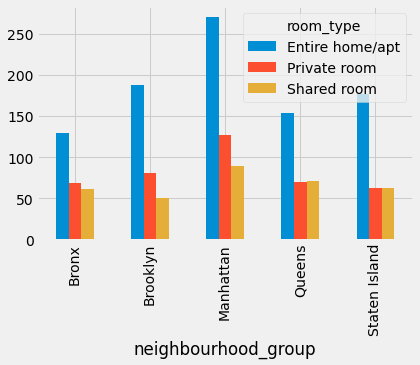

In [46]:
# Detect graph of average price of property in terms of locations

df_avg_preferred_price_unstack.plot.bar()

# Observations :
 * From the above analysis in the bar graph, we can say that Manhattan has the highest price in terms of Entire home/apt whereas average price of Shared room is the lowest in case of Brooklyn.
 * On the other hand, Bronx, Queens and Staten Island have the alomst the same price for both Private room and Shared room. And the price is alomst $50.

# Q6.Where the customers pay the maximum and minimum rent ( in terms of loactions ) ?

In [47]:
# Find out maximum rent with respect to locations by creating a new dataframe

df_max_price = df_airbnb_copy.groupby('neighbourhood_group', as_index = False)['price'].max().sort_values(['price'], ascending = False).rename(columns = {'price': "Maximum Price", 'neighbourhood_group': 'Location'})

df_max_price

,Location,Maximum Price
2,Manhattan,10000
1,Brooklyn,8000
4,Staten Island,5000
3,Queens,2600
0,Bronx,2500


In [48]:
# Find out minimum rent with respect to loactions by creating a new dataframe

df_min_price = df_airbnb_copy.groupby('neighbourhood_group', as_index = False)['price'].min().sort_values(['price'], ascending = True).rename(columns= {'price' : 'Minimum Price', 'neighbourhood_group': 'Location'})

df_min_price

,Location,Minimum Price
0,Bronx,0
1,Brooklyn,0
2,Manhattan,0
3,Queens,10
4,Staten Island,13


In [49]:
# Brief description regarding numerical columns in the dataset

df_airbnb_copy.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.620700e+04,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000
mean,7.627096e+07,40.728764,-73.950054,161.832491,7.955561,27.590079,1.307588,9.156185,152.303229
std,8.393650e+07,0.055803,0.049606,254.232662,22.787553,49.266153,1.735645,38.042091,131.818455
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8.618096e+06,40.689220,-73.983240,70.000000,1.000000,0.000000,0.000000,1.000000,21.000000
50%,3.681609e+07,40.723890,-73.954760,110.000000,3.000000,6.000000,0.610000,1.000000,125.000000
75%,1.316910e+08,40.763180,-73.932070,187.000000,5.000000,32.000000,2.030000,3.000000,283.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Observations :

* From the above dataframe, we can say that there are some values as $0 in case of minimum price. But, on the other hand, AirBNB does not provide free accommodation to its customers in any hotel. To fix this problem, we need to create a user-defined function in which the minimum price is based on the minimum night spent.

* There are also some other entries in the dataset in which minimum night is 1 and the respective price is $0.

* This is not feasible in this scenario. So, we need to replace those price values which are less than $100 with mean value.

In [50]:
# Observe where minimum nights is 1 and price is minimum

df_airbnb_copy[df_airbnb_copy['minimum_nights'] == 1].sort_values(['price', 'minimum_nights'], ascending = [True, True])

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25794,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
21700,33511962,Manhattan,Harlem,40.81302,-73.95349,Shared room,10,1,0,0.00,1,0
22835,97001292,Queens,Jamaica,40.69085,-73.79916,Entire home/apt,10,1,43,1.68,1,252
...,...,...,...,...,...,...,...,...,...,...,...,...
44034,3750764,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,0.00,6,364
42523,7407743,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,0.00,1,364
45666,262534951,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,6.15,2,179
29662,156158778,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,0.00,12,146


In [51]:
# Get the number of values whose price is less than $100

df_airbnb_copy.loc[df_airbnb_copy['price'] < 100, 'price'].count()

15763

In [52]:
# Find out the mean value of price which is less than $100

round(df_airbnb_copy.loc[df_airbnb_copy['price'] < 100, 'price'].mean())

65

In [53]:
# Modify the value price where minimum night = 1 and price of their properties are lkess than $50

df_airbnb_copy['price'] = np.where((df_airbnb_copy['price'] <= 50) & (df_airbnb_copy['minimum_nights'] == 1), 
                                   round(df_airbnb_copy.loc[df_airbnb_copy['price'] < 100, 'price'].mean()),
                                   df_airbnb_copy['price'])

Let us see how many rows we have with price $0 in the dataset.

In [ ]:
df_airbnb_copy[df_airbnb_copy['price'] == 0].count()

id                                8
name                              8
host_id                           8
host_name                         8
neighbourhood_group               8
neighbourhood                     8
latitude                          8
longitude                         8
room_type                         8
price                             8
minimum_nights                    8
number_of_reviews                 8
last_review                       7
reviews_per_month                 7
calculated_host_listings_count    8
availability_365                  8
dtype: int64

We have still 8 rows with price $0.

We need to replace those values of price with $0 with respect to minimum night.

In [ ]:
# Find out those rows where price is $0

df_airbnb_copy[df_airbnb_copy['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139


In [ ]:
# Create a custom function that provides new price with respect to minimum night

def price_cal(minm_night):
  ''' This function provides new price with respect to minimum night.'''
  mean_price = round(df_airbnb_copy.loc[df_airbnb_copy['price'] < 100, 'price'].mean())
  new_price = mean_price * minm_night

  return new_price


In [ ]:
# replace those values of price with $0 with respect to minimum night

df_airbnb_copy['price'] = np.where( (df_airbnb_copy['price'] == 0), price_cal(df_airbnb_copy['minimum_nights']), df_airbnb_copy['price'])

In [ ]:
# Lets us have a look at the new descriptionof the dataset

df_airbnb_copy.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,153.832805,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.018309,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Now lets us find out minimum rent with respect to loactions by creating a new dataframe

df_min_price = df_airbnb_copy.groupby('neighbourhood_group', as_index = False)['price'].min().sort_values(['price'], ascending = True).rename(columns= {'price' : 'Minimum Price', 'neighbourhood_group': 'Location'})

In [ ]:
df_min_price

,Location,Minimum Price
1,Brooklyn,10
2,Manhattan,10
3,Queens,10
0,Bronx,20
4,Staten Island,20


In [ ]:
# Merging dataframes of minimum and maximum price with respect to location

df_merge_price = pd.merge(df_min_price, df_max_price, on = 'Location')

In [ ]:
df_merge_price

,Location,Minimum Price,Maximum Price
0,Brooklyn,10,10000
1,Manhattan,10,10000
2,Queens,10,10000
3,Bronx,20,2500
4,Staten Island,20,5000


In [ ]:
# Make a copy of merge price dataframe

df_merge_price_copy = df_merge_price.copy()

In [ ]:
df_merge_price_copy

,Location,Minimum Price,Maximum Price
0,Brooklyn,10,10000
1,Manhattan,10,10000
2,Queens,10,10000
3,Bronx,20,2500
4,Staten Island,20,5000


In [ ]:
# Create a custom function for log transformation of minimum and maximum price

def log_val(val):
  ''' This function takes a price as an input and provides it's log value.'''

  new_min_price = np.log2(val)
  return new_min_price

In [ ]:
# Implement above custom function on merge price dataframe

df_merge_price_copy['Minimum Price'] = df_merge_price_copy.apply(lambda x : log_val(x['Minimum Price']), axis = 1)

df_merge_price_copy['Maximum Price'] = df_merge_price_copy.apply(lambda x : log_val(x['Maximum Price']), axis = 1)

In [ ]:
df_merge_price_copy

,Location,Minimum Price,Maximum Price
0,Brooklyn,3.321928,13.287712
1,Manhattan,3.321928,13.287712
2,Queens,3.321928,13.287712
3,Bronx,4.321928,11.287712
4,Staten Island,4.321928,12.287712


Now let us have a look at how maximum price alongside minimum price look like through a bar graph.

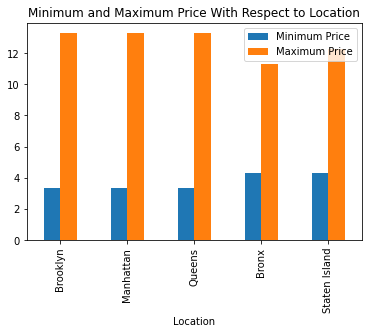

In [ ]:
# Visulaization of maximum price and minimum price ( with respect to location) through bar graph

df_merge_price_copy.plot( x = 'Location', y = ['Minimum Price', 'Maximum Price'], kind = 'bar')
plt.legend(labels = ['Minimum Price', 'Maximum Price'])
plt.title('Minimum and Maximum Price With Respect to Location')
plt.show()


# Observations:

* From the above bar graph, we can observe that the same maximum price for rent is shared by Brooklyn, Manhattan and Queens followed by Bronx and Staten Island. 
* Bronx and Staten Island also share almost the same price. 
* On the other hand,the minimum price is same in case of Brooklyn, Manhattan and Queens.

# Q7. What can we learn from predictions? (ex: locations, prices, reviews, etc)

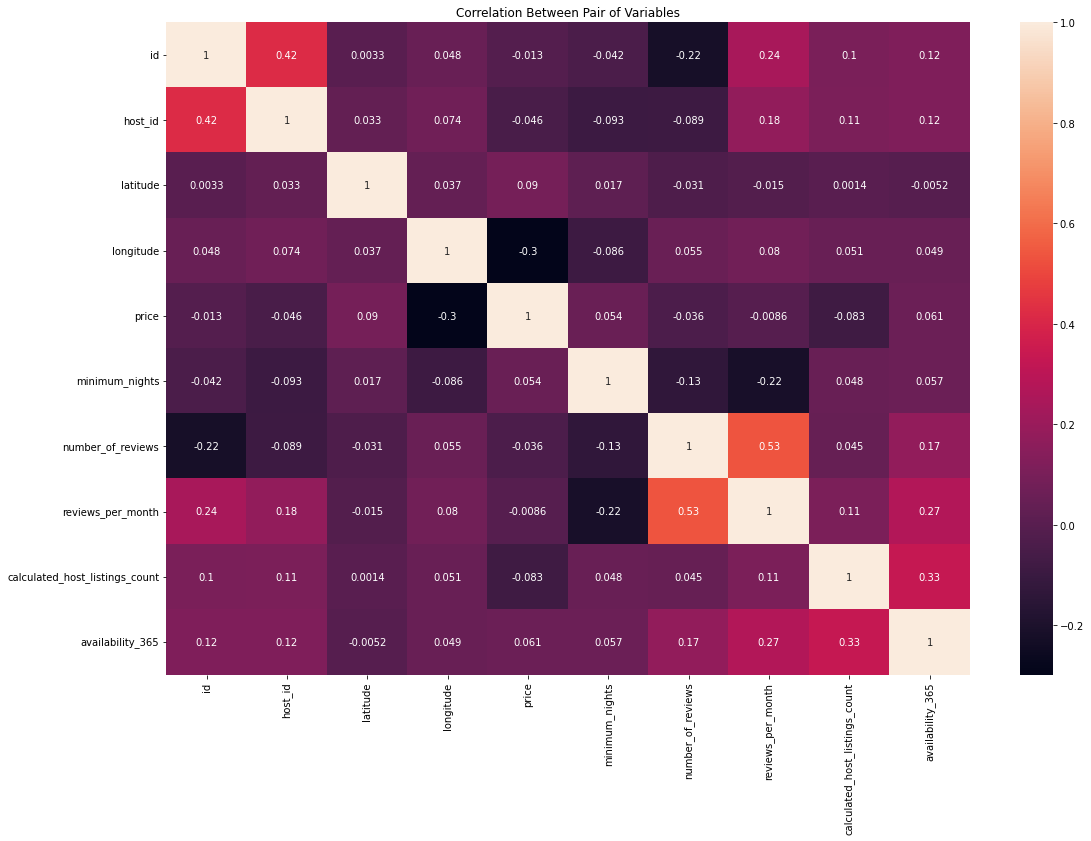

In [ ]:
# Get Correlation between different pair of variables

correlation = df_airbnb_copy.corr(method = 'kendall')
plt.figure(figsize = (18, 12))
plt.title('Correlation Between Pair of Variables')
sns.heatmap(correlation, annot = True)
plt.show()

# Observations :

* From the above graph, we can observe that there is no strong correlation in between variables except between number_of_reviews and reviews_per_month.
* We can try price prediction and reviews prediction with respect to neighbourhood group to get most reviewed listings in New York city.

# Price Prediction

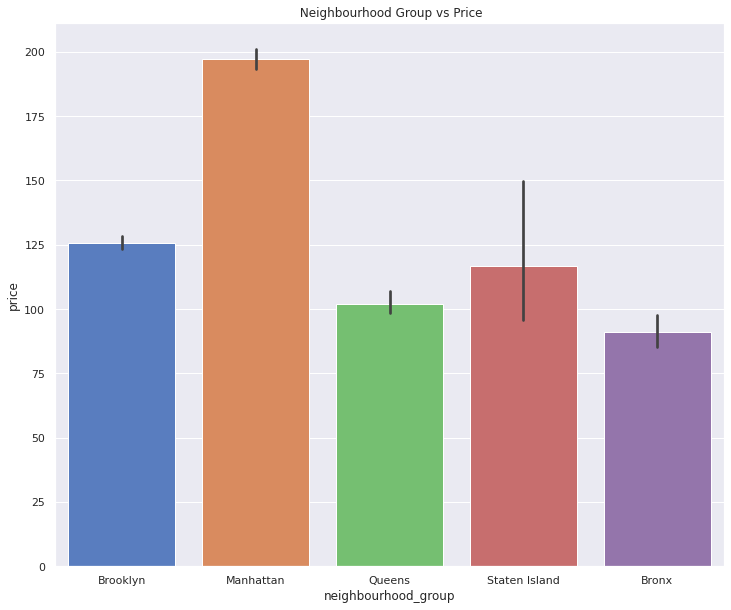

In [ ]:
plt.figure(figsize = (12, 10))
plt.title(' Neighbourhood Group vs Price')
sns.barplot(x = df_airbnb_copy.neighbourhood_group, y = df_airbnb_copy.price, palette = 'muted')
plt.show()

# Reviews Prediction

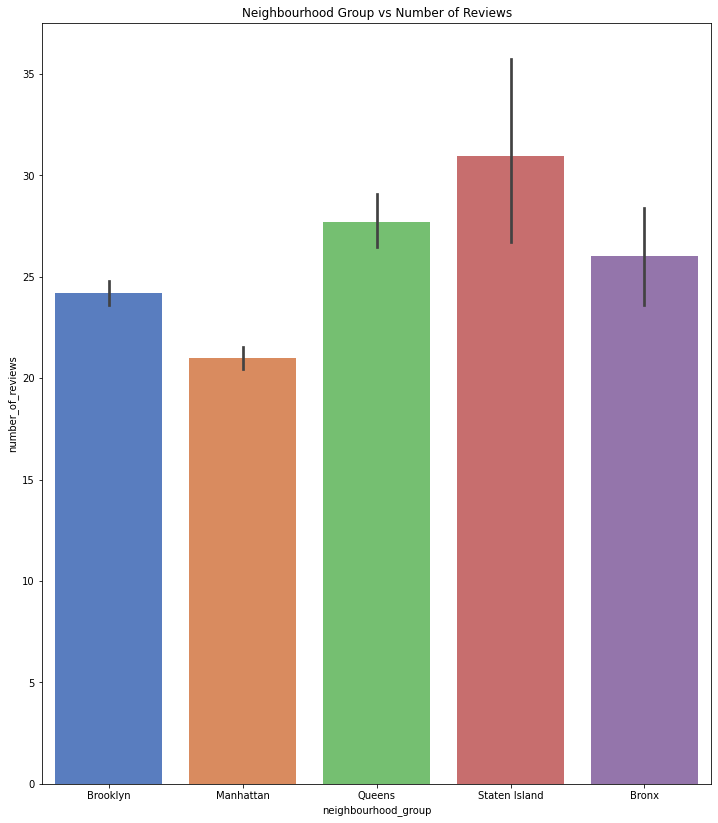

In [ ]:
plt.figure(figsize = (12,14))
plt.title('Neighbourhood Group vs Number of Reviews')
sns.barplot( x = df_airbnb_copy.neighbourhood_group, y = df_airbnb_copy.number_of_reviews,palette ='muted')
plt.show()

In [ ]:
# Let us take 5 most reviewed listings in New York city

top5_reviewed_listings = df_airbnb_copy.nlargest(5, 'number_of_reviews')
top5_reviewed_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,65,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,65,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,65,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,65,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,65,1,576,2019-06-27,13.40,2,173




Now, we need to calculate the average price of top five reviewed listings from the dataset.

In [ ]:
avg_price = top5_reviewed_listings.price.mean()
print('The average price per night is : {}'.format(avg_price))

The average price per night is : 65.0


# Observations:

From this table, we have the top five reviewed listings in AirBNB dataset and we have thfollowing points to be noted.

* It has the average price of $65

* The top five listings have shared the same price($65).

* Top number of reviews has 629 reviews.

* 5 out of 5 are of 'Private room' type.


# Q8. Find total Number of Nights Spent Per Room Types

In [61]:
# Find out unique value of room types

df_airbnb_copy['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [62]:
# Converting that array into list

list(df_airbnb_copy['room_type'].unique())

['Private room', 'Entire home/apt', 'Shared room']

In [63]:
# Find out the maximum and minimum nights spent by customers across different room types

tot_room = df_airbnb_copy.groupby('room_type')['minimum_nights'].sum().reset_index()
room_types = tot_room.sort_values('minimum_nights', ascending = True)
room_types.head()

,room_type,minimum_nights
2,Shared room,6752
1,Private room,97617
0,Entire home/apt,183678


In [64]:
# Create dataset on the basis of room type and minimum nights spent

labels = list(room_types['room_type'])
sizes = list(room_types['minimum_nights'])
# Create colour parameters
colors = ['blue', 'green', 'yellow']
# Create explode
explode = (0.09,0.09,0.09)


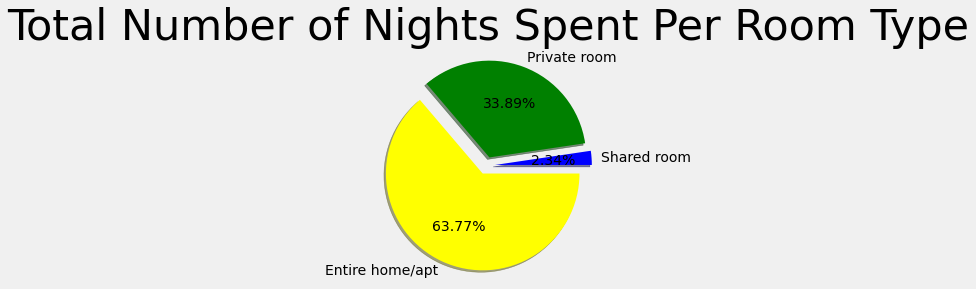

In [65]:
# Create Pie chart on the basis of room type and minimum nights spent

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.2f%%', shadow = True)
plt.title('Total Number of Nights Spent Per Room Type', fontsize = 43)
plt.axis('equal')
plt.show()

# Observations :

* From the above pie chart, we can observe that in which type of room customers prefer to stay during night time.
* It is visible that almost 64% of customers prefer to stay in Entire home/apt section during night time whereas almost half of that percentage( almost 34%) prefer tospend night in Private room. 
* And the rest almost 2% spend night in Shared room.

# Q9. Find total number of nights spent per location.

In [ ]:
# Find out the maximum and minimum nights spent by customers across different neighbourhood groups

tot_nights = df_airbnb_copy.groupby('neighbourhood_group')['minimum_nights'].sum().reset_index()
final_countdown = tot_nights.sort_values('minimum_nights', ascending = True)
final_countdown.head()

,neighbourhood_group,minimum_nights
4,Staten Island,1802
0,Bronx,4976
3,Queens,29358
1,Brooklyn,121761
2,Manhattan,185833


[Text(0, 0, 'Staten Island'),
 Text(0, 0, 'Bronx'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Manhattan')]

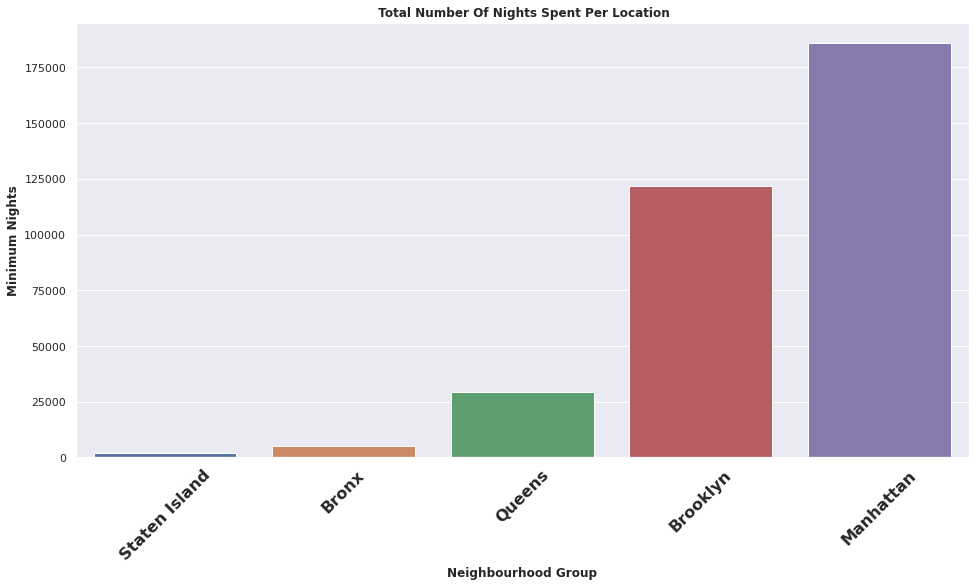

In [ ]:
# Data visualization of total number of nights spent per location by using seaborn library

sns.set(rc = {'figure.figsize': (16,8)})
sns.set_style('darkgrid')
xyz = sns.barplot(x ='neighbourhood_group', y = 'minimum_nights', data = final_countdown)
xyz.set_title(' Total Number Of Nights Spent Per Location', Weight = 'bold')
xyz.set_xlabel('Neighbourhood Group', Weight = 'bold')
xyz.set_ylabel('Minimum Nights', Weight = 'bold')
xyz.set_xticklabels(xyz.get_xticklabels(), Weight = 'bold', rotation = 45, size = '16' )

# Observations:

* The locations from neighbourhood group have been categorised on the basis of total number of minimum nights spent by customers. 

* This bar graph provides an overall idea of which location customers prefer to stay during night time.

* It is visible that customers prefer to stay in Manhattan and Brooklyn to other locations during night time.
